In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report , precision_score , recall_score , f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb


In [2]:
a = pd.read_csv(r"C:\Users\pande\OneDrive\Desktop\ML\churn_data_500.csv")
print(a.to_string(index=False))

 customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService InternetService       Contract  MonthlyCharges Churn
          1 Female              1     Yes         No      46          Yes              No Month-to-month           94.33    No
          2   Male              0     Yes         No      28           No             DSL Month-to-month          116.45   Yes
          3   Male              0     Yes         No      62           No             DSL       One year           42.39   Yes
          4 Female              0      No        Yes      25          Yes     Fiber optic Month-to-month           27.24    No
          5 Female              0      No        Yes      66           No             DSL       One year           80.59    No
          6   Male              1      No         No      36          Yes              No Month-to-month           44.90   Yes
          7   Male              1     Yes         No       1          Yes     Fiber optic       Two year       

In [4]:
a.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,MonthlyCharges,Churn
0,1,Female,1,Yes,No,46,Yes,No,Month-to-month,94.33,No
1,2,Male,0,Yes,No,28,No,DSL,Month-to-month,116.45,Yes
2,3,Male,0,Yes,No,62,No,DSL,One year,42.39,Yes
3,4,Female,0,No,Yes,25,Yes,Fiber optic,Month-to-month,27.24,No
4,5,Female,0,No,Yes,66,No,DSL,One year,80.59,No


In [5]:
a.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,MonthlyCharges,Churn
495,496,Female,1,Yes,No,29,Yes,Fiber optic,One year,91.81,Yes
496,497,Female,0,No,No,26,No,Fiber optic,Month-to-month,81.30,Yes
497,498,Female,0,No,No,37,Yes,Fiber optic,Month-to-month,82.18,Yes
498,499,Male,1,No,Yes,62,Yes,Fiber optic,Month-to-month,88.25,No
499,500,Female,1,No,Yes,43,No,DSL,Two year,57.70,Yes


In [6]:
a=a.drop("customerID",axis=1)
a

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,MonthlyCharges,Churn
0,Female,1,Yes,No,46,Yes,No,Month-to-month,94.33,No
1,Male,0,Yes,No,28,No,DSL,Month-to-month,116.45,Yes
2,Male,0,Yes,No,62,No,DSL,One year,42.39,Yes
3,Female,0,No,Yes,25,Yes,Fiber optic,Month-to-month,27.24,No
4,Female,0,No,Yes,66,No,DSL,One year,80.59,No
...,...,...,...,...,...,...,...,...,...,...
495,Female,1,Yes,No,29,Yes,Fiber optic,One year,91.81,Yes
496,Female,0,No,No,26,No,Fiber optic,Month-to-month,81.30,Yes
497,Female,0,No,No,37,Yes,Fiber optic,Month-to-month,82.18,Yes
498,Male,1,No,Yes,62,Yes,Fiber optic,Month-to-month,88.25,No


In [7]:
print(a.isnull())

     gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     False          False    False       False   False         False   
1     False          False    False       False   False         False   
2     False          False    False       False   False         False   
3     False          False    False       False   False         False   
4     False          False    False       False   False         False   
..      ...            ...      ...         ...     ...           ...   
495   False          False    False       False   False         False   
496   False          False    False       False   False         False   
497   False          False    False       False   False         False   
498   False          False    False       False   False         False   
499   False          False    False       False   False         False   

     InternetService  Contract  MonthlyCharges  Churn  
0              False     False           False  False  
1          

In [8]:
print(a.isnull().sum())


gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
InternetService    0
Contract           0
MonthlyCharges     0
Churn              0
dtype: int64


##**Label Encoding**##


In [9]:
encoded = ['gender', 'Partner' , 'Dependents' , 'PhoneService'  , 'Churn']
for col in encoded:
    le = LabelEncoder()
    a[col + '_encoded'] = le.fit_transform(a[col])
a = a.drop(columns = encoded)
print(a)

     SeniorCitizen  tenure InternetService        Contract  MonthlyCharges  \
0                1      46              No  Month-to-month           94.33   
1                0      28             DSL  Month-to-month          116.45   
2                0      62             DSL        One year           42.39   
3                0      25     Fiber optic  Month-to-month           27.24   
4                0      66             DSL        One year           80.59   
..             ...     ...             ...             ...             ...   
495              1      29     Fiber optic        One year           91.81   
496              0      26     Fiber optic  Month-to-month           81.30   
497              0      37     Fiber optic  Month-to-month           82.18   
498              1      62     Fiber optic  Month-to-month           88.25   
499              1      43             DSL        Two year           57.70   

     gender_encoded  Partner_encoded  Dependents_encoded  \
0  

In [10]:
encoded = ['InternetService' , 'Contract'] #InternetService: DSL=0, Fiber Optics= 1, No = 2,  Contract:month_to_month = 0, One Year = 1 , Two Year = 2
for col in encoded:
    le = LabelEncoder()
    a[col + '_encoded'] = le.fit_transform(a[col])
a = a.drop(columns = encoded)
print(a)

     SeniorCitizen  tenure  MonthlyCharges  gender_encoded  Partner_encoded  \
0                1      46           94.33               0                1   
1                0      28          116.45               1                1   
2                0      62           42.39               1                1   
3                0      25           27.24               0                0   
4                0      66           80.59               0                0   
..             ...     ...             ...             ...              ...   
495              1      29           91.81               0                1   
496              0      26           81.30               0                0   
497              0      37           82.18               0                0   
498              1      62           88.25               1                0   
499              1      43           57.70               0                0   

     Dependents_encoded  PhoneService_encoded  Chur

#**Scaling**#


In [11]:
scaler = StandardScaler()
a[['tenure','MonthlyCharges']] = scaler.fit_transform(a[['tenure','MonthlyCharges']])
print("Standardrized Datas:")
a[['tenure','MonthlyCharges']] 


Standardrized Datas:


,tenure,MonthlyCharges
0,0.433479,0.808652
1,-0.437933,1.577416
2,1.208067,-0.996484
3,-0.583168,-1.523011
4,1.401714,0.331128
...,...,...
495,-0.389521,0.721071
496,-0.534756,0.355804
497,-0.002227,0.386387
498,1.208067,0.597346


**Train & Test**


In [12]:
X = a.drop("Churn_encoded", axis=1)   # All columns except Churn
y = a["Churn_encoded"]   # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

     SeniorCitizen    tenure  MonthlyCharges  gender_encoded  Partner_encoded  \
249              0 -1.551404       -0.663886               1                0   
433              0 -1.745051        0.759301               0                0   
19               0  0.239832        1.692105               0                1   
322              0  0.336655       -1.205010               1                0   
332              1 -1.067286       -0.997179               0                0   
..             ...       ...             ...             ...              ...   
106              0 -1.696639        0.852094               0                0   
270              0  0.239832       -0.071674               1                0   
348              1  1.111244       -1.556028               0                1   
435              0 -1.599815       -0.523479               0                1   
102              0  0.385067        1.615645               0                1   

     Dependents_encoded  Ph

In [13]:
y_train


249    1
433    1
19     0
322    1
332    0
      ..
106    1
270    0
348    0
435    1
102    1
Name: Churn_encoded, Length: 400, dtype: int32

**Histogram of Numerical column**

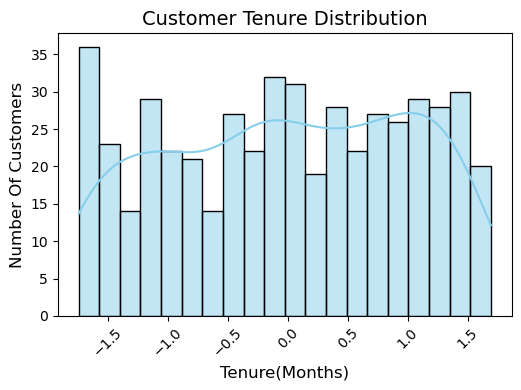

In [14]:
# Histogram of tenure
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(a['tenure'], bins=20, kde=True, color='skyblue')
plt.title('Customer Tenure Distribution',fontsize=14)
plt.xlabel('Tenure(Months)',fontsize=12)
plt.ylabel('Number Of Customers',fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

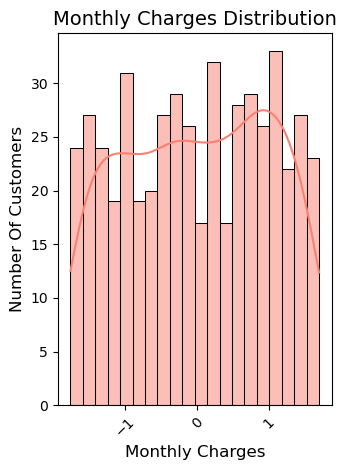

In [15]:
# Histogram of Monthly Charges
plt.subplot(1, 2, 2)
sns.histplot(a['MonthlyCharges'], bins=20, kde=True, color='salmon')
plt.title('Monthly Charges Distribution',fontsize=14)
plt.xlabel('Monthly Charges',fontsize=12)
plt.ylabel('Number Of Customers',fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Countplot(churn)**


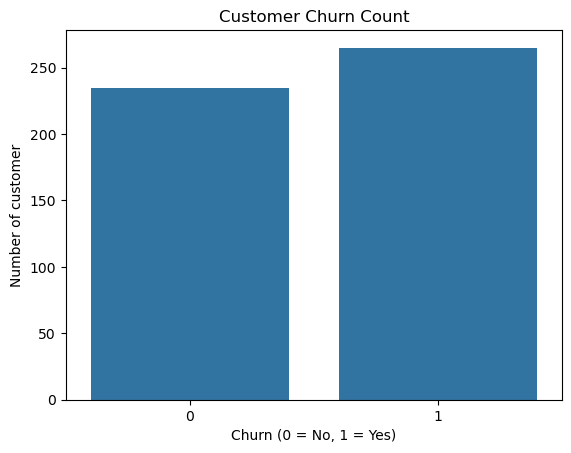

In [23]:
sns.countplot(x='Churn_encoded',data = a)
plt.title('Customer Churn Count')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel("Number of customer")
plt.show()


**Check which category has more churn**


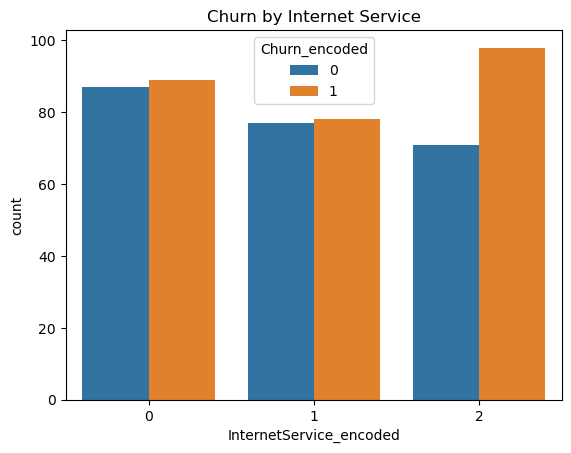

In [28]:
sns.countplot(x = "InternetService_encoded", hue = "Churn_encoded" ,data = a)
plt.title("Churn by Internet Service")
plt.show()

**LogisticRegression**

In [29]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred


array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [30]:
# Create DataFrame to compare actual and predicted
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

# Reset index to make it cleaner
comparison.reset_index(drop=True, inplace=True)
print(comparison)


    Actual  Predicted
0        0          0
1        0          1
2        1          1
3        1          0
4        1          1
..     ...        ...
95       0          1
96       0          1
97       1          0
98       1          1
99       0          1

[100 rows x 2 columns]


In [31]:
y_proba = model.predict_proba(X_test)[:, 1]  # probability of class 1 (churn)

comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Probability (Churn)": y_proba
})

print(comparison)


    Actual  Predicted  Probability (Churn)
0        0          0             0.383434
1        0          1             0.518970
2        1          1             0.571751
3        1          0             0.449551
4        1          1             0.587666
..     ...        ...                  ...
95       0          1             0.552862
96       0          1             0.531693
97       1          0             0.456373
98       1          1             0.570713
99       0          1             0.560081

[100 rows x 3 columns]


In [32]:
#Evaluate
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[18 25]
 [30 27]]

              precision    recall  f1-score   support

           0       0.38      0.42      0.40        43
           1       0.52      0.47      0.50        57

    accuracy                           0.45       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.46      0.45      0.45       100



**ConfusionMatrix**

In [33]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print()

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
print()

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
print()

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
print()

Confusion Matrix:
 [[18 25]
 [30 27]]

Accuracy: 0.45

Precision: 0.5192307692307693

Recall: 0.47368421052631576

F1 Score: 0.4954128440366973



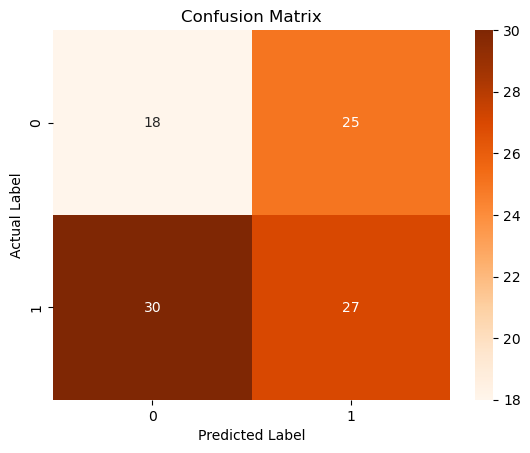

In [34]:
# Plot heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

**Decision Tree**

In [35]:
dt = DecisionTreeClassifier(criterion='gini',random_state=0)
dt.fit(X_train , y_train)



DecisionTreeClassifier(random_state=0)

In [36]:
#Prediction
y_pred_dt = dt.predict(X_test)


In [37]:
#Evaluation
print("Decision Tree Accuracy:",accuracy_score(y_test ,y_pred_dt))
print()
print(classification_report(y_test, y_pred_dt))



Decision Tree Accuracy: 0.5

              precision    recall  f1-score   support

           0       0.44      0.58      0.50        43
           1       0.58      0.44      0.50        57

    accuracy                           0.50       100
   macro avg       0.51      0.51      0.50       100
weighted avg       0.52      0.50      0.50       100



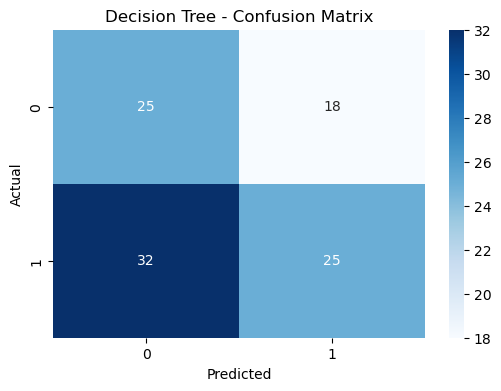

In [38]:
#Confusion Matrix
cm_dt = confusion_matrix(y_test,y_pred_dt)

#heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Random Forest**

In [39]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)



RandomForestClassifier()

In [40]:
# Predictions
y_pred_rf = rf.predict(X_test)


In [41]:
# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print()
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.46

              precision    recall  f1-score   support

           0       0.41      0.60      0.49        43
           1       0.54      0.35      0.43        57

    accuracy                           0.46       100
   macro avg       0.48      0.48      0.46       100
weighted avg       0.49      0.46      0.45       100



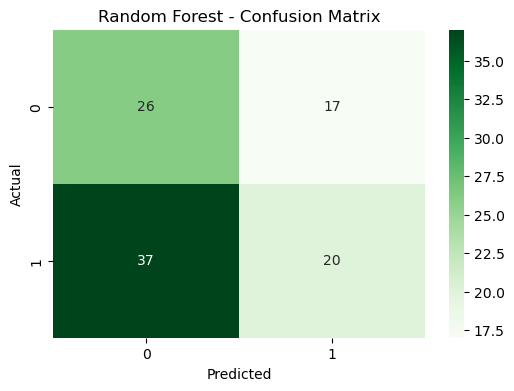

In [42]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Gradient Boosting**

In [43]:
#Train Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [44]:
# Predictions
y_pred = gb.predict(X_test)
y_pred 


array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [45]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.56      0.49        43
           1       0.58      0.46      0.51        57

    accuracy                           0.50       100
   macro avg       0.51      0.51      0.50       100
weighted avg       0.52      0.50      0.50       100



[[24 19]
 [31 26]]



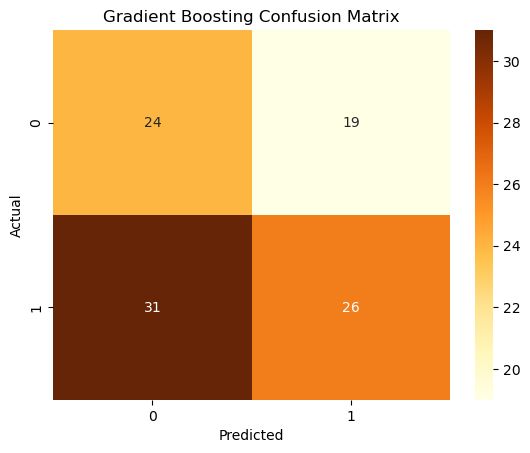

In [46]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**SVM**

In [47]:
# Train SVM
svm = SVC()
svm.fit(X_train, y_train)


SVC()

In [48]:
# Predict
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [49]:
# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print()
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.5

              precision    recall  f1-score   support

           0       0.43      0.47      0.44        43
           1       0.57      0.53      0.55        57

    accuracy                           0.50       100
   macro avg       0.50      0.50      0.49       100
weighted avg       0.51      0.50      0.50       100



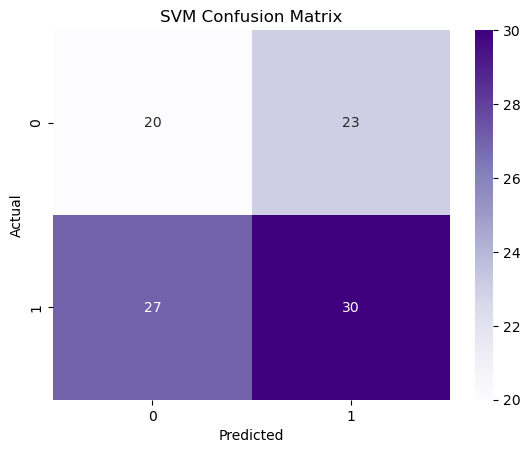

In [50]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**KNN**

In [51]:
# Train KNN (choose K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [52]:
# Predict
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0])

In [53]:
# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print()
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.51

              precision    recall  f1-score   support

           0       0.44      0.51      0.47        43
           1       0.58      0.51      0.54        57

    accuracy                           0.51       100
   macro avg       0.51      0.51      0.51       100
weighted avg       0.52      0.51      0.51       100



[[22 21]
 [28 29]]


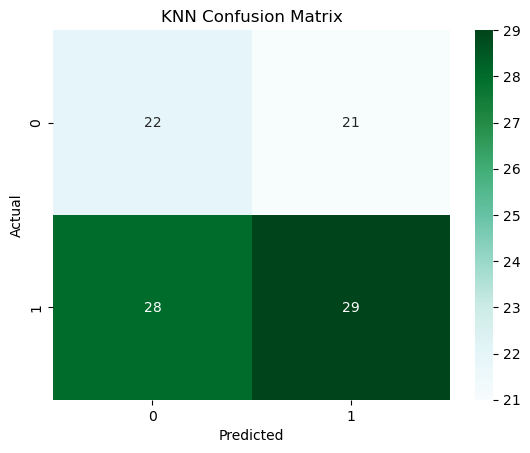

In [54]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='BuGn')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



**XGBoost**

In [55]:
#Train XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


C:\Users\pande\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:39:37] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [56]:
 #Predict and evaluate
y_pred = model.predict(X_test)
print(y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))



[0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0
 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0
 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1]
Accuracy: 0.53


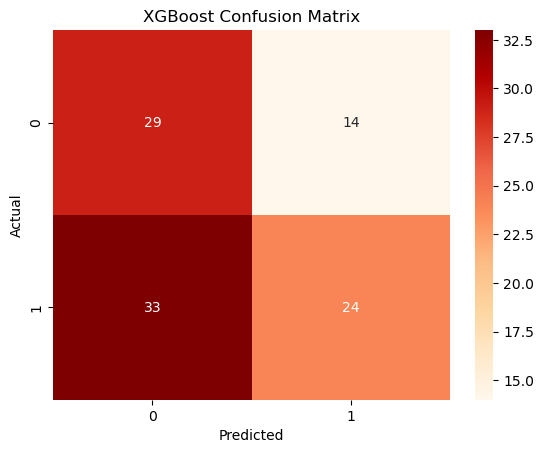

In [57]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='OrRd')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [62]:
 y_proba = model.predict_proba(X_test)
 print(y_proba)

[[0.9351884  0.06481159]
 [0.7225076  0.2774924 ]
 [0.01870745 0.98129255]
 [0.14202386 0.85797614]
 [0.6219894  0.37801057]
 [0.5913239  0.4086761 ]
 [0.95312697 0.04687303]
 [0.49162072 0.5083793 ]
 [0.00855482 0.9914452 ]
 [0.7889141  0.21108589]
 [0.84661317 0.15338686]
 [0.9812271  0.01877287]
 [0.24437404 0.75562596]
 [0.56338525 0.43661478]
 [0.92359155 0.07640847]
 [0.85422206 0.14577796]
 [0.9423956  0.05760437]
 [0.6591441  0.3408559 ]
 [0.7844372  0.21556282]
 [0.83780265 0.16219732]
 [0.35944867 0.6405513 ]
 [0.8769531  0.12304688]
 [0.49080765 0.50919235]
 [0.6820229  0.3179771 ]
 [0.39063734 0.60936266]
 [0.6262283  0.37377173]
 [0.32730758 0.6726924 ]
 [0.97749114 0.02250887]
 [0.4134801  0.5865199 ]
 [0.9856795  0.01432048]
 [0.32367486 0.67632514]
 [0.62206    0.37794   ]
 [0.0396806  0.9603194 ]
 [0.01580232 0.9841977 ]
 [0.9576549  0.04234512]
 [0.4263708  0.5736292 ]
 [0.99027914 0.00972087]
 [0.61630595 0.38369402]
 [0.10630715 0.89369285]
 [0.03136975 0.96863025]


In [60]:
row_index = 10   # jis row pe dekhna hai
sample = X.iloc[[row_index]]

y_pred = model.predict(sample)
predicted_gender = le.inverse_transform(y_pred)

print("Actual:", y.iloc[row_index])
print("Predicted:", predicted_gender[0])

Actual: 0
Predicted: Month-to-month
